<a href="https://colab.research.google.com/github/TranPhamTrungHy/AI-ST7-1234/blob/main/AI_ST_W6_11_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=cd8b433422f9faf3458874a5e20344eb94edfc837bdf3060294f42d8a8c1e0fe
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Your set point:20
The value of sensor is: 39 degree of Celcius
Needed Pwm is: 201.67361111111106


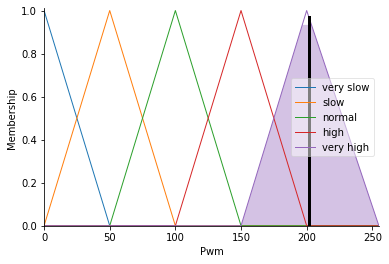

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

setpoint = ctrl.Antecedent(np.arange(18,27,0.5), 'SetPoint')
Value_sensor = ctrl.Antecedent(np.arange(0,100,1),'Sensor')
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')

setpoint['very low'] = fuzz.trimf(setpoint.universe,(18,18,19))
setpoint['cold'] = fuzz.trimf(setpoint.universe,(18,19,20))
setpoint['cool'] = fuzz.trimf(setpoint.universe,(19,20,22))
setpoint['moderate'] = fuzz.trimf(setpoint.universe,(20,22,24))
setpoint['normal'] = fuzz.trimf(setpoint.universe,(22,27,27))
#setpoint.view()

Value_sensor['very low'] = fuzz.trimf(Value_sensor.universe,(0,0,5))
Value_sensor['low'] = fuzz.trimf(Value_sensor.universe,(0,5,10))
Value_sensor['normal'] = fuzz.trimf(Value_sensor.universe,(5,15,20))
Value_sensor['high'] = fuzz.trimf(Value_sensor.universe,(15,25,30))
Value_sensor['very high'] = fuzz.trimf(Value_sensor.universe,(25,40,40))
#Value_sensor.view()

Pwm['very slow'] = fuzz.trimf(Pwm.universe,(0,0,50))
Pwm['slow'] = fuzz.trimf(Pwm.universe,(0,50,100))
Pwm['normal'] = fuzz.trimf(Pwm.universe,(50,100,150))
Pwm['high'] = fuzz.trimf(Pwm.universe,(100,150,200))
Pwm['very high'] = fuzz.trimf(Pwm.universe,(150,200,255))
#Pwm.view()

rule1 = ctrl.Rule(setpoint['freezing']&Value_sensor['very low'],Pwm['very slow'])
rule2 = ctrl.Rule(setpoint['freezing']&Value_sensor['low'],Pwm['very slow'])
rule3 = ctrl.Rule(setpoint['freezing']&Value_sensor['normal'],Pwm['slow'])
rule4 = ctrl.Rule(setpoint['freezing']&Value_sensor['high'],Pwm['high'])
rule5 = ctrl.Rule(setpoint['freezing']&Value_sensor['very high'],Pwm['very high'])

rule6 = ctrl.Rule(setpoint['cold']&Value_sensor['very low'],Pwm['very slow'])
rule7 = ctrl.Rule(setpoint['cold']&Value_sensor['low'],Pwm['very slow'])
rule8 = ctrl.Rule(setpoint['cold']&Value_sensor['normal'],Pwm['slow'])
rule9 = ctrl.Rule(setpoint['cold']&Value_sensor['high'],Pwm['high'])
rule10 = ctrl.Rule(setpoint['cold']&Value_sensor['very high'],Pwm['very high'])

rule11 = ctrl.Rule(setpoint['cool']&Value_sensor['very low'],Pwm['slow'])
rule12 = ctrl.Rule(setpoint['cool']&Value_sensor['low'],Pwm['slow'])
rule13= ctrl.Rule(setpoint['cool']&Value_sensor['normal'],Pwm['normal'])
rule14 = ctrl.Rule(setpoint['cool']&Value_sensor['high'],Pwm['high'])
rule15 = ctrl.Rule(setpoint['cool']&Value_sensor['very high'],Pwm['very high'])

rule16 = ctrl.Rule(setpoint['moderate']&Value_sensor['very low'],Pwm['slow'])
rule17 = ctrl.Rule(setpoint['moderate']&Value_sensor['low'],Pwm['normal'])
rule18 = ctrl.Rule(setpoint['moderate']&Value_sensor['normal'],Pwm['normal'])
rule19 = ctrl.Rule(setpoint['moderate']&Value_sensor['high'],Pwm['normal'])
rule20 = ctrl.Rule(setpoint['moderate']&Value_sensor['very high'],Pwm['high'])

rule21 = ctrl.Rule(setpoint['normal']&Value_sensor['very low'],Pwm['normal'])
rule22 = ctrl.Rule(setpoint['normal']&Value_sensor['low'],Pwm['normal'])
rule23 = ctrl.Rule(setpoint['normal']&Value_sensor['normal'],Pwm['slow'])
rule24 = ctrl.Rule(setpoint['normal']&Value_sensor['high'],Pwm['slow'])
rule25 = ctrl.Rule(setpoint['normal']&Value_sensor['very high'],Pwm['slow'])

acting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
acting= ctrl.ControlSystemSimulation(acting_ctrl)
a = input('Your set point:')
b = random.randrange(0,41,1)
acting.input['SetPoint'] = float(a)
acting.input['Sensor'] = b
acting.compute()
print('The value of sensor is:',b,'degree of Celcius')
print('Needed Pwm is:', acting.output['Pwm'])
Pwm.view(sim=acting)

Your set point:60
The value of sensor is: 67 %
Needed Pwm is: 49.999999999999986


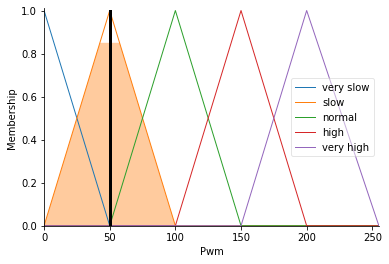

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

setpoint = ctrl.Antecedent(np.arange(40,61,0.5), 'SetPoint')
Value_sensor = ctrl.Antecedent(np.arange(0,101,1),'Sensor')
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')

setpoint['very low'] = fuzz.trimf(setpoint.universe,(40,40,42))
setpoint['low'] = fuzz.trimf(setpoint.universe,(40,42,45))
setpoint['moderate'] = fuzz.trimf(setpoint.universe,(43,50,55))
setpoint['high'] = fuzz.trimf(setpoint.universe,(53,55,58))
setpoint['very high'] = fuzz.trimf(setpoint.universe,(55,60,60))
#setpoint.view()

Value_sensor['very low'] = fuzz.trimf(Value_sensor.universe,(0,0,20))
Value_sensor['low'] = fuzz.trimf(Value_sensor.universe,(10,30,40))
Value_sensor['normal'] = fuzz.trimf(Value_sensor.universe,(30,50,60))
Value_sensor['high'] = fuzz.trimf(Value_sensor.universe,(50,70,80))
Value_sensor['very high'] = fuzz.trimf(Value_sensor.universe,(70,100,100))
#Value_sensor.view()

Pwm['very slow'] = fuzz.trimf(Pwm.universe,(0,0,50))
Pwm['slow'] = fuzz.trimf(Pwm.universe,(0,50,100))
Pwm['normal'] = fuzz.trimf(Pwm.universe,(50,100,150))
Pwm['high'] = fuzz.trimf(Pwm.universe,(100,150,200))
Pwm['very high'] = fuzz.trimf(Pwm.universe,(150,200,255))
#Pwm.view()

rule1 = ctrl.Rule(setpoint['very low']&Value_sensor['very low'],Pwm['very high'])
rule2 = ctrl.Rule(setpoint['very low']&Value_sensor['low'],Pwm['normal'])
rule3 = ctrl.Rule(setpoint['very low']&Value_sensor['normal'],Pwm['very slow'])
rule4 = ctrl.Rule(setpoint['very low']&Value_sensor['high'],Pwm['very slow'])
rule5 = ctrl.Rule(setpoint['very low']&Value_sensor['very high'],Pwm['very slow'])

rule6 = ctrl.Rule(setpoint['low']&Value_sensor['very low'],Pwm['very high'])
rule7 = ctrl.Rule(setpoint['low']&Value_sensor['low'],Pwm['slow'])
rule8 = ctrl.Rule(setpoint['low']&Value_sensor['normal'],Pwm['very slow'])
rule9 = ctrl.Rule(setpoint['low']&Value_sensor['high'],Pwm['very slow'])
rule10 = ctrl.Rule(setpoint['low']&Value_sensor['very high'],Pwm['very slow'])

rule11 = ctrl.Rule(setpoint['moderate']&Value_sensor['very low'],Pwm['very high'])
rule12 = ctrl.Rule(setpoint['moderate']&Value_sensor['low'],Pwm['normal'])
rule13= ctrl.Rule(setpoint['moderate']&Value_sensor['normal'],Pwm['very slow'])
rule14 = ctrl.Rule(setpoint['moderate']&Value_sensor['high'],Pwm['very slow'])
rule15 = ctrl.Rule(setpoint['moderate']&Value_sensor['very high'],Pwm['very slow'])

rule16 = ctrl.Rule(setpoint['high']&Value_sensor['very low'],Pwm['very high'])
rule17 = ctrl.Rule(setpoint['high']&Value_sensor['low'],Pwm['high'])
rule18 = ctrl.Rule(setpoint['high']&Value_sensor['normal'],Pwm['very slow'])
rule19 = ctrl.Rule(setpoint['high']&Value_sensor['high'],Pwm['very slow'])
rule20 = ctrl.Rule(setpoint['high']&Value_sensor['very high'],Pwm['very slow'])

rule21 = ctrl.Rule(setpoint['very high']&Value_sensor['very low'],Pwm['very high'])
rule22 = ctrl.Rule(setpoint['very high']&Value_sensor['low'],Pwm['high'])
rule23 = ctrl.Rule(setpoint['very high']&Value_sensor['normal'],Pwm['normal'])
rule24 = ctrl.Rule(setpoint['very high']&Value_sensor['high'],Pwm['slow'])
rule25 = ctrl.Rule(setpoint['very high']&Value_sensor['very high'],Pwm['very slow'])

acting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
acting= ctrl.ControlSystemSimulation(acting_ctrl)
a = input('Your set point:')
b = random.randrange(0,101,1)
acting.input['SetPoint'] = float(a)
acting.input['Sensor'] = b
acting.compute()
print('The value of sensor is:',b,'%')
print('Needed Pwm is:', acting.output['Pwm'])
Pwm.view(sim=acting)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

setpoint = ctrl.Antecedent(np.arange(40,61,0.5), 'SetPoint')
Value_sensor = ctrl.Antecedent(np.arange(0,101,1),'Sensor')
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')

setpoint['very low'] = fuzz.trimf(setpoint.universe,(40,40,42))
setpoint['low'] = fuzz.trimf(setpoint.universe,(40,42,45))
setpoint['moderate'] = fuzz.trimf(setpoint.universe,(43,50,55))
setpoint['high'] = fuzz.trimf(setpoint.universe,(53,55,58))
setpoint['very high'] = fuzz.trimf(setpoint.universe,(55,60,60))
#setpoint.view()

Value_sensor['very low'] = fuzz.trimf(Value_sensor.universe,(0,0,20))
Value_sensor['low'] = fuzz.trimf(Value_sensor.universe,(10,30,40))
Value_sensor['normal'] = fuzz.trimf(Value_sensor.universe,(30,50,60))
Value_sensor['high'] = fuzz.trimf(Value_sensor.universe,(50,70,80))
Value_sensor['very high'] = fuzz.trimf(Value_sensor.universe,(70,100,100))
#Value_sensor.view()

Pwm['very slow'] = fuzz.trimf(Pwm.universe,(0,0,50))
Pwm['slow'] = fuzz.trimf(Pwm.universe,(0,50,100))
Pwm['normal'] = fuzz.trimf(Pwm.universe,(50,100,150))
Pwm['high'] = fuzz.trimf(Pwm.universe,(100,150,200))
Pwm['very high'] = fuzz.trimf(Pwm.universe,(150,200,255))
#Pwm.view()

rule1 = ctrl.Rule(setpoint['very low']&Value_sensor['very low'],Pwm['very high'])
rule2 = ctrl.Rule(setpoint['very low']&Value_sensor['low'],Pwm['normal'])
rule3 = ctrl.Rule(setpoint['very low']&Value_sensor['normal'],Pwm['very slow'])
rule4 = ctrl.Rule(setpoint['very low']&Value_sensor['high'],Pwm['very slow'])
rule5 = ctrl.Rule(setpoint['very low']&Value_sensor['very high'],Pwm['very slow'])

rule6 = ctrl.Rule(setpoint['low']&Value_sensor['very low'],Pwm['very high'])
rule7 = ctrl.Rule(setpoint['low']&Value_sensor['low'],Pwm['slow'])
rule8 = ctrl.Rule(setpoint['low']&Value_sensor['normal'],Pwm['very slow'])
rule9 = ctrl.Rule(setpoint['low']&Value_sensor['high'],Pwm['very slow'])
rule10 = ctrl.Rule(setpoint['low']&Value_sensor['very high'],Pwm['very slow'])

rule11 = ctrl.Rule(setpoint['moderate']&Value_sensor['very low'],Pwm['very high'])
rule12 = ctrl.Rule(setpoint['moderate']&Value_sensor['low'],Pwm['normal'])
rule13= ctrl.Rule(setpoint['moderate']&Value_sensor['normal'],Pwm['very slow'])
rule14 = ctrl.Rule(setpoint['moderate']&Value_sensor['high'],Pwm['very slow'])
rule15 = ctrl.Rule(setpoint['moderate']&Value_sensor['very high'],Pwm['very slow'])

rule16 = ctrl.Rule(setpoint['high']&Value_sensor['very low'],Pwm['very high'])
rule17 = ctrl.Rule(setpoint['high']&Value_sensor['low'],Pwm['high'])
rule18 = ctrl.Rule(setpoint['high']&Value_sensor['normal'],Pwm['very slow'])
rule19 = ctrl.Rule(setpoint['high']&Value_sensor['high'],Pwm['very slow'])
rule20 = ctrl.Rule(setpoint['high']&Value_sensor['very high'],Pwm['very slow'])

rule21 = ctrl.Rule(setpoint['very high']&Value_sensor['very low'],Pwm['very high'])
rule22 = ctrl.Rule(setpoint['very high']&Value_sensor['low'],Pwm['high'])
rule23 = ctrl.Rule(setpoint['very high']&Value_sensor['normal'],Pwm['normal'])
rule24 = ctrl.Rule(setpoint['very high']&Value_sensor['high'],Pwm['slow'])
rule25 = ctrl.Rule(setpoint['very high']&Value_sensor['very high'],Pwm['very slow'])

acting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
acting= ctrl.ControlSystemSimulation(acting_ctrl)
a = input('Your set point:')
b = random.randrange(0,101,1)
acting.input['SetPoint'] = float(a)
acting.input['Sensor'] = b
acting.compute()
print('The value of sensor is:',b,'%')
print('Needed Pwm is:', acting.output['Pwm'])
Pwm.view(sim=acting)